<a href="https://colab.research.google.com/github/mohmaed7777/epilepsy-detection/blob/main/Epilepsy_Detection_Using_EEG_Signals2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# 2. Make a directory named “.kaggle”
! mkdir ~/.kaggle

In [3]:
#3. Copy the “kaggle.json” into this new directory
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
# download the datasets fro the resourse
! kaggle datasets download oussamabenhassine/epilepsy-detection-using-eeg-signals


 81% 10.0M/12.3M [00:00<00:00, 16.1MB/s]
100% 12.3M/12.3M [00:00<00:00, 13.9MB/s]


In [6]:
! unzip epilepsy-detection-using-eeg-signals.zip

Archive:  epilepsy-detection-using-eeg-signals.zip
  inflating: eeg_data.csv            


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 
print('Ready to go!')

Ready to go!


In [8]:
data = pd.read_csv('/content/eeg_data.csv')
data.head()

,FP1_power_delta,FP1_power_theta,FP1_power_alpha,FP1_power_beta,FP1_power_gamma,FP2_power_delta,FP2_power_theta,FP2_power_alpha,FP2_power_beta,FP2_power_gamma,...,T5_STD_D4,T5_STD_D5,T5_STD_D6,T6_STD_D1,T6_STD_D2,T6_STD_D3,T6_STD_D4,T6_STD_D5,T6_STD_D6,epileptic_
0,15.980332,8.633358,3.092433,0.846559,0.372832,17.581626,9.937238,3.485713,0.945396,0.428797,...,31.427918,29.699413,32.013546,3.583559,12.529528,45.831132,61.890813,34.783454,33.245906,1
1,223.267803,41.573241,13.043525,6.463381,6.168712,298.274432,50.013025,14.411482,6.659230,4.942250,...,24.822720,47.185918,93.619195,14.158489,15.217886,30.927407,77.324322,153.442359,213.780950,1
2,158.673907,31.788608,9.956198,3.736977,2.926979,232.762741,39.332981,10.956081,3.478036,2.153082,...,21.708222,47.412375,85.729645,9.493639,11.824569,24.555772,59.229187,112.406306,171.618208,1
3,29.767326,3.875543,1.553127,0.438266,0.140495,45.206547,5.173542,2.028637,0.528962,0.161283,...,26.319506,39.628894,51.473202,1.872515,5.392639,17.296780,35.824586,44.892899,79.613460,1
4,33.821075,3.635210,1.347280,0.313205,0.080396,55.670043,4.925017,1.783729,0.394463,0.102254,...,26.111048,39.177537,52.925676,1.408291,4.556997,12.733549,25.676801,44.406617,94.770581,1


In [9]:
data.dtypes

FP1_power_delta    float64
FP1_power_theta    float64
FP1_power_alpha    float64
FP1_power_beta     float64
FP1_power_gamma    float64
                    ...   
T6_STD_D3          float64
T6_STD_D4          float64
T6_STD_D5          float64
T6_STD_D6          float64
epileptic_           int64
Length: 668, dtype: object

In [10]:
data.isnull().sum()

FP1_power_delta    0
FP1_power_theta    0
FP1_power_alpha    0
FP1_power_beta     0
FP1_power_gamma    0
                  ..
T6_STD_D3          0
T6_STD_D4          0
T6_STD_D5          0
T6_STD_D6          0
epileptic_         0
Length: 668, dtype: int64

In [11]:
data.describe()

,FP1_power_delta,FP1_power_theta,FP1_power_alpha,FP1_power_beta,FP1_power_gamma,FP2_power_delta,FP2_power_theta,FP2_power_alpha,FP2_power_beta,FP2_power_gamma,...,T5_STD_D4,T5_STD_D5,T5_STD_D6,T6_STD_D1,T6_STD_D2,T6_STD_D3,T6_STD_D4,T6_STD_D5,T6_STD_D6,epileptic_
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,2784.618464,988.760235,746.234771,701.487094,1001.431795,2085.578266,992.570476,895.149975,668.364261,1031.370227,...,58.296417,88.001721,143.249343,34.949327,29.083232,46.686025,61.305950,91.994480,150.603345,0.460289
std,27119.740834,12199.666703,12018.648373,10668.946271,14544.502538,20670.847816,12618.098105,14047.391047,10791.187751,14990.469348,...,203.322445,304.407625,468.151048,315.861267,171.065282,217.826912,207.851277,308.832664,489.946628,0.498533
min,0.025945,0.012101,0.009409,0.007828,0.008412,0.026174,0.018836,0.010871,0.006120,0.006863,...,0.950777,1.057651,1.118569,0.525890,0.846936,0.878841,0.909989,0.918962,1.115070,0.000000
25%,25.524041,3.983245,1.868825,0.789355,0.381195,27.138890,4.254592,1.989122,0.845677,0.408081,...,12.298674,14.891381,23.835592,3.525874,5.796019,11.084702,14.190864,16.742939,26.750093,0.000000
50%,68.865751,8.807711,3.874506,1.795211,0.972968,73.483311,9.688978,4.133793,1.863871,0.973485,...,18.643405,23.730646,39.095777,5.855205,8.580373,15.806232,20.932141,27.049199,44.603975,0.000000
75%,271.174926,30.093458,12.052042,6.926863,3.777847,288.354575,29.503963,12.237335,7.139232,3.782326,...,32.798456,51.946562,84.372372,11.453332,14.326938,27.297323,36.869445,57.139089,101.925711,1.000000
max,859895.816209,350651.120898,403916.724142,291058.726462,285573.572449,604373.606743,346870.948081,407756.698134,291640.733124,287933.513127,...,3283.112473,5501.471732,11030.429643,5777.660876,3620.162008,4585.801410,3620.523797,5538.873638,10730.168759,1.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Columns: 668 entries, FP1_power_delta to epileptic_
dtypes: float64(667), int64(1)
memory usage: 11.3 MB


# **Visualization:=**

**In order to visualizate data we are going to use seaborn plots that is not used in other kernels to inform you and for diversity of plots. What I use in real life is mostly violin plot and swarm plot. Do not forget we are not selecting feature, we are trying to know data like looking at the drink list at the pub door.**

**Before applying bar plot we need to normalization or standirdization. Because differences between values of features are very high to observe on plot. I plot features in 3 group and each group includes 10 features to observe better.**

In [ ]:
y = data.epileptic_                          # M or B 
list = ['epileptic_']
x = data.drop(list,axis = 1 )
x.head()

,FP1_power_delta,FP1_power_theta,FP1_power_alpha,FP1_power_beta,FP1_power_gamma,FP2_power_delta,FP2_power_theta,FP2_power_alpha,FP2_power_beta,FP2_power_gamma,...,T5_STD_D3,T5_STD_D4,T5_STD_D5,T5_STD_D6,T6_STD_D1,T6_STD_D2,T6_STD_D3,T6_STD_D4,T6_STD_D5,T6_STD_D6
0,15.980332,8.633358,3.092433,0.846559,0.372832,17.581626,9.937238,3.485713,0.945396,0.428797,...,18.725281,31.427918,29.699413,32.013546,3.583559,12.529528,45.831132,61.890813,34.783454,33.245906
1,223.267803,41.573241,13.043525,6.463381,6.168712,298.274432,50.013025,14.411482,6.659230,4.942250,...,17.750953,24.822720,47.185918,93.619195,14.158489,15.217886,30.927407,77.324322,153.442359,213.780950
2,158.673907,31.788608,9.956198,3.736977,2.926979,232.762741,39.332981,10.956081,3.478036,2.153082,...,13.739782,21.708222,47.412375,85.729645,9.493639,11.824569,24.555772,59.229187,112.406306,171.618208
3,29.767326,3.875543,1.553127,0.438266,0.140495,45.206547,5.173542,2.028637,0.528962,0.161283,...,11.443707,26.319506,39.628894,51.473202,1.872515,5.392639,17.296780,35.824586,44.892899,79.613460
4,33.821075,3.635210,1.347280,0.313205,0.080396,55.670043,4.925017,1.783729,0.394463,0.102254,...,11.015096,26.111048,39.177537,52.925676,1.408291,4.556997,12.733549,25.676801,44.406617,94.770581


Number of Epileptic:  1196
Number of Non_epileptic :  1020


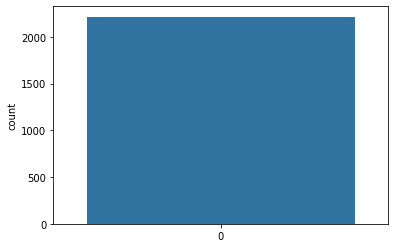

In [ ]:
ax = sns.countplot(y,label="Count")       # M = 212, B = 357
Epileptic, Non_epileptic = y.value_counts()
print('Number of Epileptic: ',Epileptic)
print('Number of Non_epileptic : ',Non_epileptic)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'FP1_power_delta'),
  Text(1, 0, 'FP1_power_theta'),
  Text(2, 0, 'FP1_power_alpha'),
  Text(3, 0, 'FP1_power_beta'),
  Text(4, 0, 'FP1_power_gamma'),
  Text(5, 0, 'FP2_power_delta'),
  Text(6, 0, 'FP2_power_theta'),
  Text(7, 0, 'FP2_power_alpha'),
  Text(8, 0, 'FP2_power_beta'),
  Text(9, 0, 'FP2_power_gamma')])

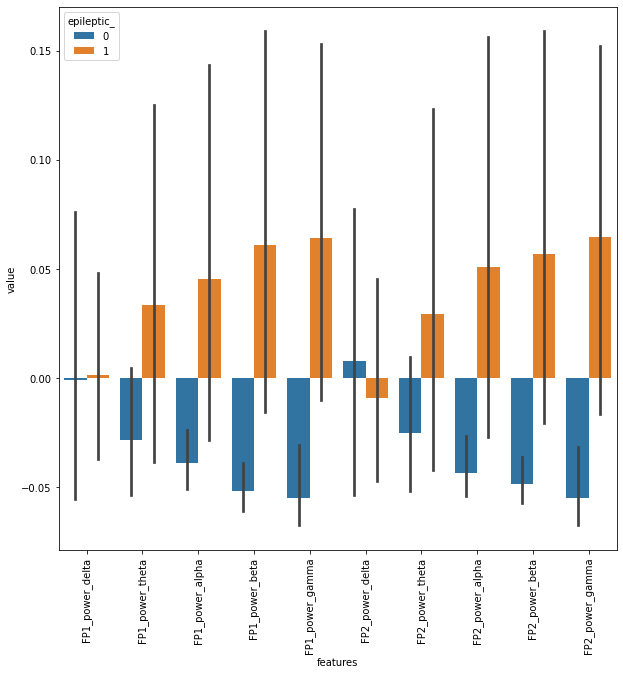

In [ ]:
# first ten features
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="epileptic_",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.barplot(x="features", y="value", hue="epileptic_", data=data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'F3_power_delta'),
  Text(1, 0, 'F3_power_theta'),
  Text(2, 0, 'F3_power_alpha'),
  Text(3, 0, 'F3_power_beta'),
  Text(4, 0, 'F3_power_gamma'),
  Text(5, 0, 'F4_power_delta'),
  Text(6, 0, 'F4_power_theta'),
  Text(7, 0, 'F4_power_alpha'),
  Text(8, 0, 'F4_power_beta'),
  Text(9, 0, 'F4_power_gamma')])

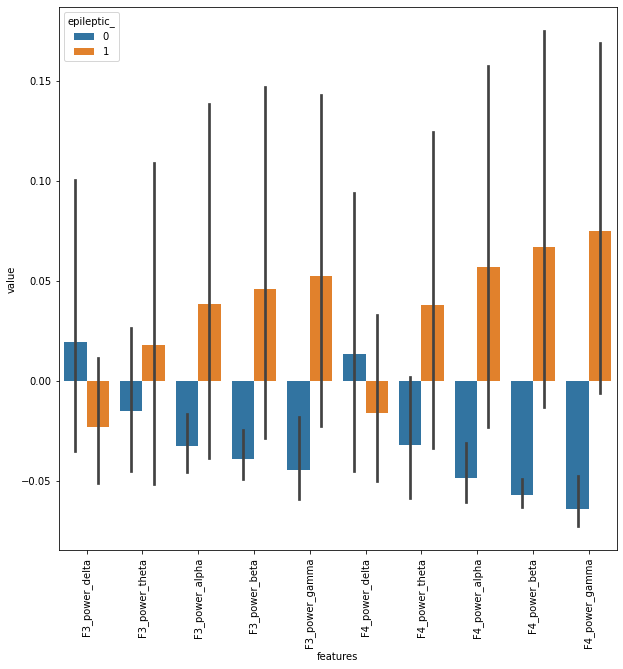

In [ ]:
# Second ten features
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="epileptic_",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.barplot(x="features", y="value", hue="epileptic_", data=data)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'C3_power_delta'),
  Text(1, 0, 'C3_power_theta'),
  Text(2, 0, 'C3_power_alpha'),
  Text(3, 0, 'C3_power_beta'),
  Text(4, 0, 'C3_power_gamma'),
  Text(5, 0, 'C4_power_delta'),
  Text(6, 0, 'C4_power_theta'),
  Text(7, 0, 'C4_power_alpha'),
  Text(8, 0, 'C4_power_beta'),
  Text(9, 0, 'C4_power_gamma'),
  Text(10, 0, 'P3_power_delta')])

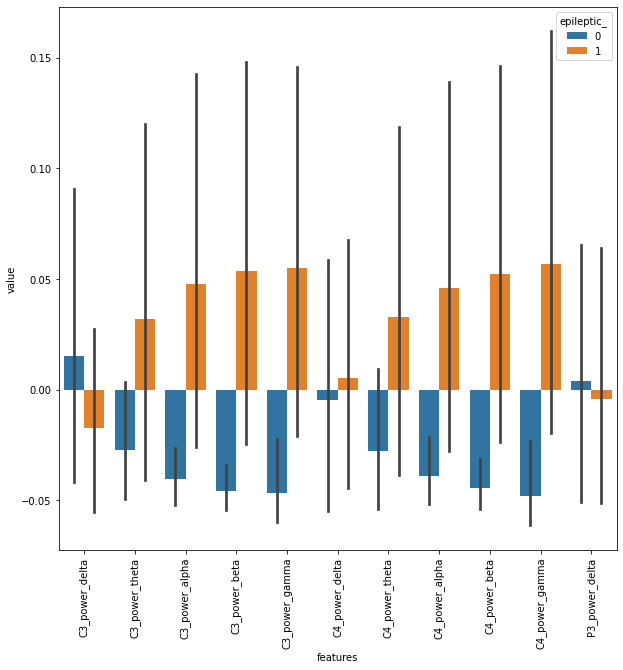

In [ ]:
# 3ed ten features
data = pd.concat([y,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="epileptic_",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.barplot(x="features", y="value", hue="epileptic_", data=data)
plt.xticks(rotation=90)

In [ ]:
df_copied = data.copy()

# **PCA:=**

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

In [14]:
X = data.drop('epileptic_', axis=1, inplace=False)
y = data.epileptic_

In [15]:
X.head()

,FP1_power_delta,FP1_power_theta,FP1_power_alpha,FP1_power_beta,FP1_power_gamma,FP2_power_delta,FP2_power_theta,FP2_power_alpha,FP2_power_beta,FP2_power_gamma,...,T5_STD_D3,T5_STD_D4,T5_STD_D5,T5_STD_D6,T6_STD_D1,T6_STD_D2,T6_STD_D3,T6_STD_D4,T6_STD_D5,T6_STD_D6
0,15.980332,8.633358,3.092433,0.846559,0.372832,17.581626,9.937238,3.485713,0.945396,0.428797,...,18.725281,31.427918,29.699413,32.013546,3.583559,12.529528,45.831132,61.890813,34.783454,33.245906
1,223.267803,41.573241,13.043525,6.463381,6.168712,298.274432,50.013025,14.411482,6.659230,4.942250,...,17.750953,24.822720,47.185918,93.619195,14.158489,15.217886,30.927407,77.324322,153.442359,213.780950
2,158.673907,31.788608,9.956198,3.736977,2.926979,232.762741,39.332981,10.956081,3.478036,2.153082,...,13.739782,21.708222,47.412375,85.729645,9.493639,11.824569,24.555772,59.229187,112.406306,171.618208
3,29.767326,3.875543,1.553127,0.438266,0.140495,45.206547,5.173542,2.028637,0.528962,0.161283,...,11.443707,26.319506,39.628894,51.473202,1.872515,5.392639,17.296780,35.824586,44.892899,79.613460
4,33.821075,3.635210,1.347280,0.313205,0.080396,55.670043,4.925017,1.783729,0.394463,0.102254,...,11.015096,26.111048,39.177537,52.925676,1.408291,4.556997,12.733549,25.676801,44.406617,94.770581


In [16]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: epileptic_, dtype: int64

In [ ]:
# Split the data: 
sss = StratifiedShuffleSplit(n_splits=5, random_state=42)

def get_avg_score(n):
    pipe = [
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=n)),
        ('estimator', LogisticRegression(solver='liblinear'))
    ]
    pipe = Pipeline(pipe)
    scores = []
    for train_index, test_index in sss.split(X, y):
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]
        pipe.fit(X_train, y_train)
        scores.append(accuracy_score(y_test, pipe.predict(X_test)))
    return np.mean(scores)


ns = [10, 20, 50, 100, 150, 200, 300, 400]
score_list = [get_avg_score(n) for n in ns]

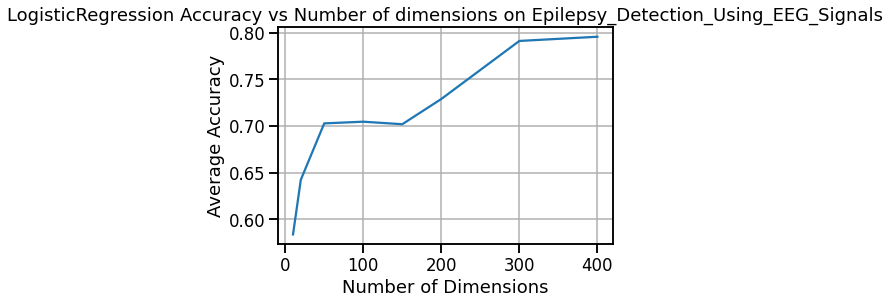

In [ ]:
import seaborn as sns
sns.set_context('talk')

ax = plt.axes()
ax.plot(ns, score_list)
ax.set(xlabel='Number of Dimensions',
       ylabel='Average Accuracy',
       title='LogisticRegression Accuracy vs Number of dimensions on Epilepsy_Detection_Using_EEG_Signals')
ax.grid(True)

In [21]:
# Split the data: 
sss = StratifiedShuffleSplit(n_splits=5, random_state=42)

def get_avg_score(n):
    pipe = [
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=n)),
        ('estimator', LogisticRegression(solver='liblinear'))
    ]
    pipe = Pipeline(pipe)
    scores = []
    for train_index, test_index in sss.split(X, y):
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]
        pipe.fit(X_train, y_train)
        scores.append(recall_score(y_test, pipe.predict(X_test)))
    return np.mean(scores)


ns = [10, 20, 50, 100, 150, 200, 300, 400]
score_list = [get_avg_score(n) for n in ns]

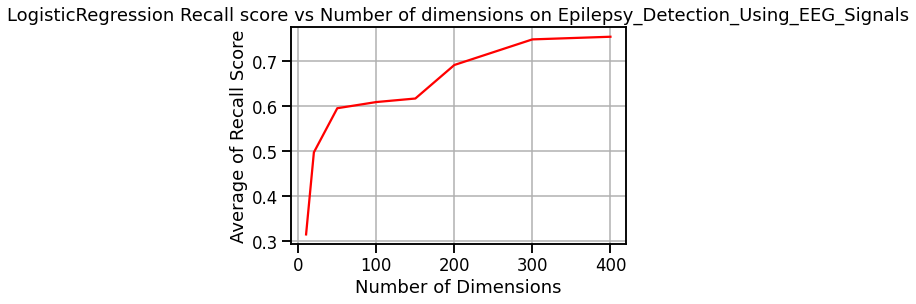

In [24]:
import seaborn as sns
sns.set_context('talk')

ax = plt.axes()
ax.plot(ns, score_list, color='red')
ax.set(xlabel='Number of Dimensions',
       ylabel='Average of Recall Score',
       title='LogisticRegression Recall score vs Number of dimensions on Epilepsy_Detection_Using_EEG_Signals')
ax.grid(True)

# **Applying Random Forest Classifier:=**

In [ ]:
sss_rf = StratifiedShuffleSplit(n_splits=5, random_state=42)

def get_avg_score_rf(n):
    pipe = [
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=n)),
        ('estimator', RandomForestClassifier(max_depth=70,max_features='auto',min_samples_leaf=4,min_samples_split=10,n_estimators=600))
    ]
    pipe = Pipeline(pipe)
    scores = []
    for train_index, test_index in sss_rf.split(X, y):
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]
        pipe.fit(X_train, y_train)
        scores.append(accuracy_score(y_test, pipe.predict(X_test)))
    return np.mean(scores)


ns = [10, 20, 50, 100, 150, 200, 300, 400]
score_list = [get_avg_score_rf(n) for n in ns]

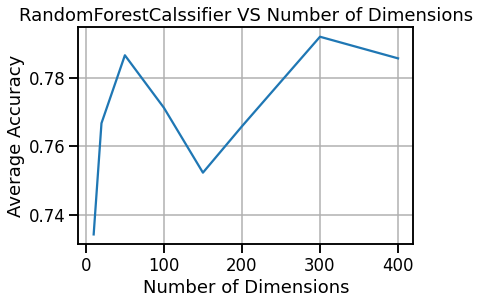

In [ ]:
sns.set_context('talk')
ax = plt.axes()
ax.plot(ns, score_list)
ax.set(xlabel='Number of Dimensions',
       ylabel='Average Accuracy',
       title='RandomForestCalssifier VS Number of Dimensions')
ax.grid(True)

In [25]:
sss_rf = StratifiedShuffleSplit(n_splits=5, random_state=42)

def get_avg_score_rf(n):
    pipe = [
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=n)),
        ('estimator', RandomForestClassifier(max_depth=70,max_features='auto',min_samples_leaf=4,min_samples_split=10,n_estimators=600))
    ]
    pipe = Pipeline(pipe)
    scores = []
    for train_index, test_index in sss_rf.split(X, y):
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]
        pipe.fit(X_train, y_train)
        scores.append(recall_score(y_test, pipe.predict(X_test)))
    return np.mean(scores)


ns = [10, 20, 50, 100, 150, 200, 300, 400]
score_list = [get_avg_score_rf(n) for n in ns]

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

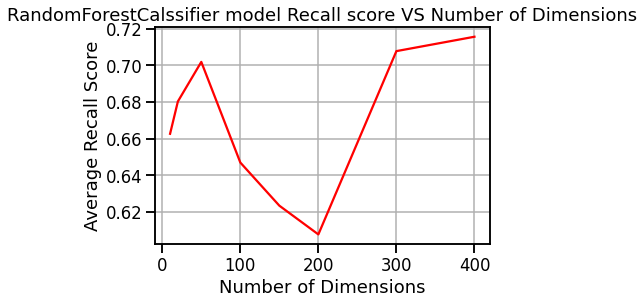

In [26]:
sns.set_context('talk')
ax = plt.axes()
ax.plot(ns, score_list, color='red')
ax.set(xlabel='Number of Dimensions',
       ylabel='Average Recall Score',
       title='RandomForestCalssifier model Recall score VS Number of Dimensions')
ax.grid(True)

# **Applying XGboost Classifier:=**

In [ ]:
sss_xb = StratifiedShuffleSplit(n_splits=5, random_state=42)

def get_avg_score_xb(n):
    pipe = [
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=n)),
        ('estimator', XGBClassifier(learning_rate=0.1, max_depth=10,n_estimators=7,random_state=5441))
    ]
    pipe = Pipeline(pipe)
    scores = []
    for train_index, test_index in sss_xb.split(X, y):
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]
        pipe.fit(X_train, y_train)
        scores.append(accuracy_score(y_test, pipe.predict(X_test)))
    return np.mean(scores)


ns = [10, 20, 50, 100, 150, 200, 300, 400]
score_list = [get_avg_score_rf(n) for n in ns]

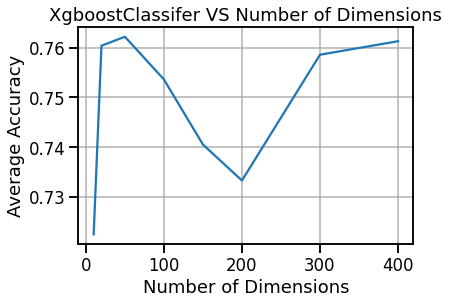

In [ ]:
sns.set_context('talk')
ax = plt.axes()
ax.plot(ns, score_list)
ax.set(xlabel='Number of Dimensions',
       ylabel='Average Accuracy',
       title='XgboostClassifer VS Number of Dimensions')
ax.grid(True)

In [27]:
sss_xb = StratifiedShuffleSplit(n_splits=5, random_state=42)

def get_avg_score_xb(n):
    pipe = [
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=n)),
        ('estimator', XGBClassifier(learning_rate=0.1, max_depth=10,n_estimators=7,random_state=5441))
    ]
    pipe = Pipeline(pipe)
    scores = []
    for train_index, test_index in sss_xb.split(X, y):
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]
        pipe.fit(X_train, y_train)
        scores.append(recall_score(y_test, pipe.predict(X_test)))
    return np.mean(scores)


ns = [10, 20, 50, 100, 150, 200, 300, 400]
score_list = [get_avg_score_rf(n) for n in ns]

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

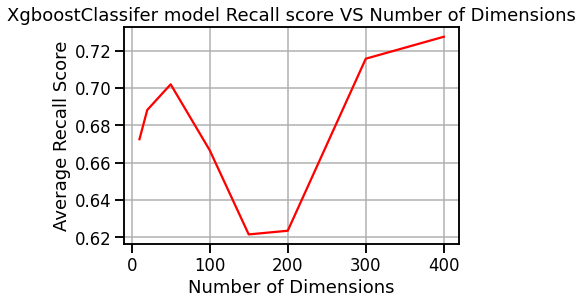

In [28]:
sns.set_context('talk')
ax = plt.axes()
ax.plot(ns, score_list, color='red')
ax.set(xlabel='Number of Dimensions',
       ylabel='Average Recall Score',
       title='XgboostClassifer model Recall score VS Number of Dimensions')
ax.grid(True)